<a href="https://colab.research.google.com/github/mladbago/podstawy_sztucznej_inteligencji/blob/main/Z10_I_save_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow import keras
print(tf.__version__)

print(keras.__version__)

2.12.0
2.12.0


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

In [4]:
# Wczytaj dane treningowe i testowe
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

train_set = pd.read_csv('https://raw.githubusercontent.com/mladbago/podstawy_sztucznej_inteligencji/main/Dane/adult/adult.data', sep=", ",header = None)
test_set = pd.read_csv('https://raw.githubusercontent.com/mladbago/podstawy_sztucznej_inteligencji/main/Dane/adult/adult.test', sep=", ",skiprows = 1, header = None) # Make sure to skip a row for the test set

col_labels = ['age', 'workclass', 'fnlwgt', 'education', 'education_num', 'marital_status', 'occupation', 
              'relationship', 'race', 'sex', 'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
             'wage_class']
train_set.columns = col_labels
test_set.columns = col_labels

train = train_set.replace('?', np.nan).dropna()
test = test_set.replace('?', np.nan).dropna()

train_set.head()


<ipython-input-4-d866d9954fc4>:6: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  train_set = pd.read_csv('https://raw.githubusercontent.com/mladbago/podstawy_sztucznej_inteligencji/main/Dane/adult/adult.data', sep=", ",header = None)
<ipython-input-4-d866d9954fc4>:7: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  test_set = pd.read_csv('https://raw.githubusercontent.com/mladbago/podstawy_sztucznej_inteligencji/main/Dane/adult/adult.test', sep=", ",skiprows = 1, header = None) # Make sure to skip a row for the test set


,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


# Zad.
Zróbmy szybki preprocesing

In [5]:
dataset = pd.concat([train,test])

dataset['wage_class'] = dataset.wage_class.replace({'<=50K.': 0,'<=50K':0, '>50K.':1, '>50K':1})

dataset.drop(["fnlwgt"],axis=1,inplace=True)

dataset.drop(["education"],axis=1,inplace=True)

x = dataset.groupby('native_country')["wage_class"].mean()

d = dict(pd.cut(x[x.index!=" United-States"],5,labels=range(5)))

dataset['native_country'] = dataset['native_country'].replace(d)

dataset = pd.get_dummies(dataset,drop_first=True)

train = dataset.iloc[:train.shape[0]]
test = dataset.iloc[train.shape[0]:]

X_train = train.drop("wage_class",axis=1)
y_train = train.wage_class

X_test = test.drop("wage_class",axis=1)
y_test = test.wage_class


In [6]:
from keras.callbacks import ModelCheckpoint

In [7]:
from keras.models import Sequential
from keras.layers import Dense

from keras.callbacks import History

history = History()
model = Sequential()
model.add(Dense(100,activation="sigmoid",input_shape=(X_train.shape[1],)))
model.add(Dense(50,activation="sigmoid"))
model.add(Dense(10,activation="sigmoid"))
model.add(Dense(1,activation="sigmoid"))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               4200      
                                                                 
 dense_1 (Dense)             (None, 50)                5050      
                                                                 
 dense_2 (Dense)             (None, 10)                510       
                                                                 
 dense_3 (Dense)             (None, 1)                 11        
                                                                 
Total params: 9,771
Trainable params: 9,771
Non-trainable params: 0
_________________________________________________________________


In [8]:
save_best_model = ModelCheckpoint("wagi_best.h5py",save_best_only=True)
model.compile(loss="binary_crossentropy",optimizer="Adam", metrics=["accuracy"])

In [9]:
save_best_model = ModelCheckpoint("wagi_best.h5py",save_best_only=True)
history = model.fit(X_train, y_train, validation_data= (X_test, y_test), batch_size=32,epochs=100, callbacks=[save_best_model])

Epoch 1/100
943/943 [==============================] - ETA: 0s - loss: 0.4413 - accuracy: 0.7893

943/943 [==============================] - 5s 4ms/step - loss: 0.4413 - accuracy: 0.7893 - val_loss: 0.3772 - val_accuracy: 0.8131
Epoch 2/100
927/943 [============================>.] - ETA: 0s - loss: 0.3805 - accuracy: 0.8098

943/943 [==============================] - 4s 4ms/step - loss: 0.3802 - accuracy: 0.8100 - val_loss: 0.3741 - val_accuracy: 0.8096
Epoch 3/100
940/943 [============================>.] - ETA: 0s - loss: 0.3748 - accuracy: 0.8126

943/943 [==============================] - 3s 3ms/step - loss: 0.3748 - accuracy: 0.8124 - val_loss: 0.3737 - val_accuracy: 0.8149
Epoch 4/100
921/943 [============================>.] - ETA: 0s - loss: 0.3701 - accuracy: 0.8179

943/943 [==============================] - 3s 3ms/step - loss: 0.3697 - accuracy: 0.8181 - val_loss: 0.3575 - val_accuracy: 0.8345
Epoch 5/100
916/943 [============================>.] - ETA: 0s - loss: 0.3566 - accuracy: 0.8279

943/943 [==============================] - 4s 4ms/step - loss: 0.3568 - accuracy: 0.8278 - val_loss: 0.3555 - val_accuracy: 0.8241
Epoch 6/100
935/943 [============================>.] - ETA: 0s - loss: 0.3544 - accuracy: 0.8298

943/943 [==============================] - 4s 4ms/step - loss: 0.3541 - accuracy: 0.8300 - val_loss: 0.3504 - val_accuracy: 0.8316
Epoch 7/100
943/943 [==============================] - 2s 2ms/step - loss: 0.3554 - accuracy: 0.8286 - val_loss: 0.3566 - val_accuracy: 0.8260
Epoch 8/100
943/943 [==============================] - 2s 2ms/step - loss: 0.3520 - accuracy: 0.8298 - val_loss: 0.3633 - val_accuracy: 0.8207
Epoch 9/100
943/943 [==============================] - 2s 3ms/step - loss: 0.3490 - accuracy: 0.8319 - val_loss: 0.3604 - val_accuracy: 0.8195
Epoch 10/100
931/943 [============================>.] - ETA: 0s - loss: 0.3488 - accuracy: 0.8318

943/943 [==============================] - 4s 4ms/step - loss: 0.3488 - accuracy: 0.8319 - val_loss: 0.3485 - val_accuracy: 0.8303
Epoch 11/100
932/943 [============================>.] - ETA: 0s - loss: 0.3475 - accuracy: 0.8346

943/943 [==============================] - 4s 4ms/step - loss: 0.3473 - accuracy: 0.8348 - val_loss: 0.3457 - val_accuracy: 0.8309
Epoch 12/100
943/943 [==============================] - 2s 3ms/step - loss: 0.3501 - accuracy: 0.8307 - val_loss: 0.3580 - val_accuracy: 0.8182
Epoch 13/100
943/943 [==============================] - 2s 3ms/step - loss: 0.3528 - accuracy: 0.8288 - val_loss: 0.3461 - val_accuracy: 0.8315
Epoch 14/100
943/943 [==============================] - 3s 4ms/step - loss: 0.3460 - accuracy: 0.8330 - val_loss: 0.3485 - val_accuracy: 0.8345
Epoch 15/100
943/943 [==============================] - 2s 3ms/step - loss: 0.3446 - accuracy: 0.8343 - val_loss: 0.3480 - val_accuracy: 0.8312
Epoch 16/100
940/943 [============================>.] - ETA: 0s - loss: 0.3500 - accuracy: 0.8285

943/943 [==============================] - 3s 3ms/step - loss: 0.3501 - accuracy: 0.8284 - val_loss: 0.3451 - val_accuracy: 0.8357
Epoch 17/100
943/943 [==============================] - 2s 3ms/step - loss: 0.3455 - accuracy: 0.8321 - val_loss: 0.3492 - val_accuracy: 0.8337
Epoch 18/100
943/943 [==============================] - 3s 3ms/step - loss: 0.3462 - accuracy: 0.8320 - val_loss: 0.3472 - val_accuracy: 0.8315
Epoch 19/100
939/943 [============================>.] - ETA: 0s - loss: 0.3410 - accuracy: 0.8346

943/943 [==============================] - 4s 4ms/step - loss: 0.3411 - accuracy: 0.8346 - val_loss: 0.3435 - val_accuracy: 0.8347
Epoch 20/100
943/943 [==============================] - 2s 3ms/step - loss: 0.3427 - accuracy: 0.8331 - val_loss: 0.3441 - val_accuracy: 0.8319
Epoch 21/100
943/943 [==============================] - 2s 3ms/step - loss: 0.3433 - accuracy: 0.8336 - val_loss: 0.3447 - val_accuracy: 0.8357
Epoch 22/100
943/943 [==============================] - 2s 3ms/step - loss: 0.3468 - accuracy: 0.8323 - val_loss: 0.3512 - val_accuracy: 0.8322
Epoch 23/100
943/943 [==============================] - 3s 4ms/step - loss: 0.3435 - accuracy: 0.8340 - val_loss: 0.3460 - val_accuracy: 0.8342
Epoch 24/100
943/943 [==============================] - 2s 2ms/step - loss: 0.3436 - accuracy: 0.8333 - val_loss: 0.3607 - val_accuracy: 0.8242
Epoch 25/100
943/943 [==============================] - 2s 2ms/step - loss: 0.3446 - accuracy: 0.8319 - val_loss: 0.3443 - val_accuracy: 0.8162
Epoch

943/943 [==============================] - 3s 3ms/step - loss: 0.3419 - accuracy: 0.8326 - val_loss: 0.3426 - val_accuracy: 0.8355
Epoch 30/100
943/943 [==============================] - 2s 3ms/step - loss: 0.3408 - accuracy: 0.8334 - val_loss: 0.3618 - val_accuracy: 0.8163
Epoch 31/100
943/943 [==============================] - 2s 3ms/step - loss: 0.3445 - accuracy: 0.8298 - val_loss: 0.3560 - val_accuracy: 0.8250
Epoch 32/100
943/943 [==============================] - 3s 3ms/step - loss: 0.3402 - accuracy: 0.8358 - val_loss: 0.3522 - val_accuracy: 0.8321
Epoch 33/100
943/943 [==============================] - 3s 3ms/step - loss: 0.3397 - accuracy: 0.8349 - val_loss: 0.3492 - val_accuracy: 0.8255
Epoch 34/100
943/943 [==============================] - 2s 3ms/step - loss: 0.3420 - accuracy: 0.8340 - val_loss: 0.3495 - val_accuracy: 0.8309
Epoch 35/100
943/943 [==============================] - 2s 3ms/step - loss: 0.3403 - accuracy: 0.8345 - val_loss: 0.3463 - val_accuracy: 0.8335
Epoch

943/943 [==============================] - 3s 3ms/step - loss: 0.3415 - accuracy: 0.8345 - val_loss: 0.3423 - val_accuracy: 0.8361
Epoch 41/100
943/943 [==============================] - 2s 2ms/step - loss: 0.3435 - accuracy: 0.8287 - val_loss: 0.3521 - val_accuracy: 0.8309
Epoch 42/100
932/943 [============================>.] - ETA: 0s - loss: 0.3392 - accuracy: 0.8347

943/943 [==============================] - 5s 5ms/step - loss: 0.3395 - accuracy: 0.8345 - val_loss: 0.3414 - val_accuracy: 0.8329
Epoch 43/100
943/943 [==============================] - 2s 2ms/step - loss: 0.3410 - accuracy: 0.8341 - val_loss: 0.3432 - val_accuracy: 0.8339
Epoch 44/100
943/943 [==============================] - 2s 3ms/step - loss: 0.3418 - accuracy: 0.8302 - val_loss: 0.3426 - val_accuracy: 0.8357
Epoch 45/100
943/943 [==============================] - 2s 3ms/step - loss: 0.3388 - accuracy: 0.8355 - val_loss: 0.3484 - val_accuracy: 0.8325
Epoch 46/100
943/943 [==============================] - 3s 4ms/step - loss: 0.3383 - accuracy: 0.8372 - val_loss: 0.3554 - val_accuracy: 0.8331
Epoch 47/100
943/943 [==============================] - 2s 2ms/step - loss: 0.3392 - accuracy: 0.8335 - val_loss: 0.3542 - val_accuracy: 0.8272
Epoch 48/100
943/943 [==============================] - 2s 2ms/step - loss: 0.3361 - accuracy: 0.8377 - val_loss: 0.3426 - val_accuracy: 0.8344
Epoch

943/943 [==============================] - 3s 3ms/step - loss: 0.3373 - accuracy: 0.8338 - val_loss: 0.3406 - val_accuracy: 0.8341
Epoch 68/100
943/943 [==============================] - 2s 2ms/step - loss: 0.3332 - accuracy: 0.8381 - val_loss: 0.3451 - val_accuracy: 0.8368
Epoch 69/100
943/943 [==============================] - 2s 3ms/step - loss: 0.3327 - accuracy: 0.8389 - val_loss: 0.3465 - val_accuracy: 0.8355
Epoch 70/100
943/943 [==============================] - 4s 4ms/step - loss: 0.3335 - accuracy: 0.8352 - val_loss: 0.3477 - val_accuracy: 0.8278
Epoch 71/100
943/943 [==============================] - 2s 3ms/step - loss: 0.3344 - accuracy: 0.8386 - val_loss: 0.3429 - val_accuracy: 0.8349
Epoch 72/100
943/943 [==============================] - 2s 3ms/step - loss: 0.3344 - accuracy: 0.8386 - val_loss: 0.3447 - val_accuracy: 0.8343
Epoch 73/100
943/943 [==============================] - 3s 3ms/step - loss: 0.3333 - accuracy: 0.8410 - val_loss: 0.3464 - val_accuracy: 0.8315
Epoch

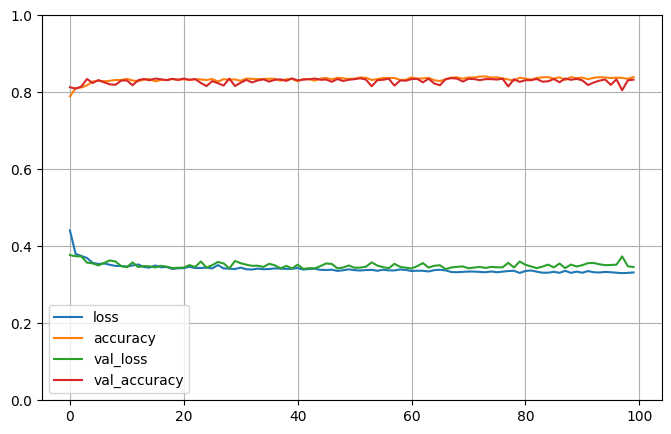

In [10]:
import pandas as pd

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [11]:
model.evaluate(X_test,y_test)

471/471 [==============================] - 1s 1ms/step - loss: 0.3460 - accuracy: 0.8328


[0.34601372480392456, 0.8328021168708801]

In [12]:
from sklearn import  metrics
metrics.accuracy_score(y_true= y_test, y_pred= model.predict_classes(X_test) )

AttributeError: ignored

# Zad

Wczytaj nauczony model

In [13]:
model.load_weights("wagi_best.h5py")
model.evaluate(X_test,y_test)

471/471 [==============================] - 1s 1ms/step - loss: 0.3406 - accuracy: 0.8341


[0.3405696153640747, 0.8340637683868408]

# Zad

* Naucz dowolny model na zbiorze MNIST.
* Zapisz optymalne parametry uczenia do pliku
* Wczytaj dane z pliku

In [14]:
(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [15]:
X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.

In [16]:
from keras.utils import np_utils
# one hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

y_valid = np_utils.to_categorical(y_valid)

print(y_train)

[[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]]


In [17]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

model.summary()

save_best_model = ModelCheckpoint("wagi_best2.h5py",save_best_only=True)
model.compile(loss="categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])
save_best_model = ModelCheckpoint("wagi_best2.h5py",save_best_only=True)
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid), callbacks=[save_best_model])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________
Epoch 1/30
1719/1719 [==============================] - ETA: 0s - loss: 0.6102 - accuracy: 0.8425

1719/1719 [==============================] - 19s 9ms/step - loss: 0.6102 - accuracy: 0.8425 - val_loss: 0.3075 - val_accuracy: 0.9174
Epoch 2/30
1714/1719 [============================>.] - ETA: 0s - loss: 0.2877 - accuracy: 0.9184

1719/1719 [==============================] - 7s 4ms/step - loss: 0.2877 - accuracy: 0.9184 - val_loss: 0.2399 - val_accuracy: 0.9350
Epoch 3/30
1712/1719 [============================>.] - ETA: 0s - loss: 0.2343 - accuracy: 0.9329

1719/1719 [==============================] - 8s 5ms/step - loss: 0.2341 - accuracy: 0.9329 - val_loss: 0.1984 - val_accuracy: 0.9446
Epoch 4/30
1709/1719 [============================>.] - ETA: 0s - loss: 0.1990 - accuracy: 0.9433

1719/1719 [==============================] - 7s 4ms/step - loss: 0.1990 - accuracy: 0.9434 - val_loss: 0.1757 - val_accuracy: 0.9528
Epoch 5/30
1707/1719 [============================>.] - ETA: 0s - loss: 0.1737 - accuracy: 0.9507

1719/1719 [==============================] - 7s 4ms/step - loss: 0.1737 - accuracy: 0.9507 - val_loss: 0.1565 - val_accuracy: 0.9576
Epoch 6/30
1716/1719 [============================>.] - ETA: 0s - loss: 0.1542 - accuracy: 0.9561

1719/1719 [==============================] - 8s 5ms/step - loss: 0.1541 - accuracy: 0.9561 - val_loss: 0.1432 - val_accuracy: 0.9618
Epoch 7/30
1706/1719 [============================>.] - ETA: 0s - loss: 0.1384 - accuracy: 0.9609

1719/1719 [==============================] - 7s 4ms/step - loss: 0.1383 - accuracy: 0.9609 - val_loss: 0.1322 - val_accuracy: 0.9648
Epoch 8/30
1706/1719 [============================>.] - ETA: 0s - loss: 0.1253 - accuracy: 0.9647

1719/1719 [==============================] - 8s 5ms/step - loss: 0.1253 - accuracy: 0.9646 - val_loss: 0.1265 - val_accuracy: 0.9672
Epoch 9/30
1707/1719 [============================>.] - ETA: 0s - loss: 0.1144 - accuracy: 0.9680

1719/1719 [==============================] - 7s 4ms/step - loss: 0.1144 - accuracy: 0.9681 - val_loss: 0.1161 - val_accuracy: 0.9686
Epoch 10/30
1713/1719 [============================>.] - ETA: 0s - loss: 0.1051 - accuracy: 0.9708

1719/1719 [==============================] - 8s 5ms/step - loss: 0.1050 - accuracy: 0.9708 - val_loss: 0.1072 - val_accuracy: 0.9702
Epoch 11/30
1718/1719 [============================>.] - ETA: 0s - loss: 0.0964 - accuracy: 0.9732

1719/1719 [==============================] - 7s 4ms/step - loss: 0.0964 - accuracy: 0.9732 - val_loss: 0.1044 - val_accuracy: 0.9726
Epoch 12/30
1714/1719 [============================>.] - ETA: 0s - loss: 0.0887 - accuracy: 0.9757

1719/1719 [==============================] - 8s 4ms/step - loss: 0.0891 - accuracy: 0.9756 - val_loss: 0.1004 - val_accuracy: 0.9714
Epoch 13/30
1719/1719 [==============================] - ETA: 0s - loss: 0.0826 - accuracy: 0.9770

1719/1719 [==============================] - 8s 4ms/step - loss: 0.0826 - accuracy: 0.9770 - val_loss: 0.0941 - val_accuracy: 0.9750
Epoch 14/30
1712/1719 [============================>.] - ETA: 0s - loss: 0.0763 - accuracy: 0.9796

1719/1719 [==============================] - 7s 4ms/step - loss: 0.0763 - accuracy: 0.9795 - val_loss: 0.0932 - val_accuracy: 0.9740
Epoch 15/30
1716/1719 [============================>.] - ETA: 0s - loss: 0.0711 - accuracy: 0.9806

1719/1719 [==============================] - 14s 8ms/step - loss: 0.0711 - accuracy: 0.9806 - val_loss: 0.0889 - val_accuracy: 0.9752
Epoch 16/30
1711/1719 [============================>.] - ETA: 0s - loss: 0.0665 - accuracy: 0.9815

1719/1719 [==============================] - 8s 5ms/step - loss: 0.0664 - accuracy: 0.9816 - val_loss: 0.0860 - val_accuracy: 0.9760
Epoch 17/30
1704/1719 [============================>.] - ETA: 0s - loss: 0.0621 - accuracy: 0.9833

1719/1719 [==============================] - 7s 4ms/step - loss: 0.0620 - accuracy: 0.9833 - val_loss: 0.0857 - val_accuracy: 0.9754
Epoch 18/30
1714/1719 [============================>.] - ETA: 0s - loss: 0.0579 - accuracy: 0.9847

1719/1719 [==============================] - 10s 6ms/step - loss: 0.0578 - accuracy: 0.9847 - val_loss: 0.0830 - val_accuracy: 0.9762
Epoch 19/30
1714/1719 [============================>.] - ETA: 0s - loss: 0.0541 - accuracy: 0.9861

1719/1719 [==============================] - 8s 5ms/step - loss: 0.0541 - accuracy: 0.9861 - val_loss: 0.0816 - val_accuracy: 0.9772
Epoch 20/30
1707/1719 [============================>.] - ETA: 0s - loss: 0.0508 - accuracy: 0.9870

1719/1719 [==============================] - 7s 4ms/step - loss: 0.0507 - accuracy: 0.9870 - val_loss: 0.0809 - val_accuracy: 0.9764
Epoch 21/30
1708/1719 [============================>.] - ETA: 0s - loss: 0.0477 - accuracy: 0.9876

1719/1719 [==============================] - 8s 5ms/step - loss: 0.0477 - accuracy: 0.9876 - val_loss: 0.0764 - val_accuracy: 0.9790
Epoch 22/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.0449 - accuracy: 0.9886 - val_loss: 0.0777 - val_accuracy: 0.9778
Epoch 23/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.0422 - accuracy: 0.9896 - val_loss: 0.0772 - val_accuracy: 0.9772
Epoch 24/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.0394 - accuracy: 0.9904 - val_loss: 0.0766 - val_accuracy: 0.9766
Epoch 25/30
1717/1719 [============================>.] - ETA: 0s - loss: 0.0374 - accuracy: 0.9904

1719/1719 [==============================] - 8s 5ms/step - loss: 0.0374 - accuracy: 0.9904 - val_loss: 0.0743 - val_accuracy: 0.9776
Epoch 26/30
1714/1719 [============================>.] - ETA: 0s - loss: 0.0352 - accuracy: 0.9915

1719/1719 [==============================] - 8s 5ms/step - loss: 0.0352 - accuracy: 0.9915 - val_loss: 0.0713 - val_accuracy: 0.9798
Epoch 27/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.0333 - accuracy: 0.9918 - val_loss: 0.0719 - val_accuracy: 0.9798
Epoch 28/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.0313 - accuracy: 0.9929 - val_loss: 0.0740 - val_accuracy: 0.9798
Epoch 29/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.0293 - accuracy: 0.9933 - val_loss: 0.0720 - val_accuracy: 0.9786
Epoch 30/30
1719/1719 [==============================] - 8s 4ms/step - loss: 0.0277 - accuracy: 0.9938 - val_loss: 0.0724 - val_accuracy: 0.9798


In [18]:
model.load_weights("wagi_best2.h5py")
model.evaluate(X_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0716 - accuracy: 0.9781


[0.071595199406147, 0.9781000018119812]